# Capstone Project: The Battle of the Neighborhoods

### Applied Data Science Capstone by IBM/Coursera

<b> Table of Contents </b>
* [Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

### Problem <a name="introduction"></a>

A childhood friend contacted me recently about a business idea. She is originally from Portland, Oregon, but after high school, she moved away to go to art school. Since then, she has completed her BFA and spent a number of years developing her skills as a tattoo artist. Now she is ready to return to Portland. Her plan is to open her own tattoo parlor, and she asked if I would help her find the best possible location for her business.

After researching the question, "Who gets tattoos in the United States?", we discovered a couple of facts that will help guide us in thinking about where to open a tattoo parlor:

* About a third of people between 18 and 29 have at least one tattoo.
* Older Millenials (aged 30-39) are the most likely to get a tattoo.

(Source: https://comparecamp.com/tattoo-statistics/)

Realizing that many people between the ages of 18 and 39 will get at least one tattoo, we will look for neighborhoods in Portland where the most residents are within these age ranges. We will also pay attention to where tattoo parlors already exist in Portland and what kinds of businesses already exist in these neighborhoods.

### Data <a name="data"></a>

I will use three sources of data to find the best possible location for my friend's tattoo parlor.

First, I will download a list of all Portland neighborhoods and their geospatial data from portlandmaps.com. Portlandmaps.com is a website published by the City of Portland and provides open-source data. Their website can be found at https://gis-pdx.opendata.arcgis.com/. For my project, I will use their Neighborhood (Regions) data set (https://gis-pdx.opendata.arcgis.com/datasets/neighborhoods-regions/explore?location=45.542750%2C-122.667150%2C11.72).

Second, I will use census data that the City of Portland posted at https://www.portlandoregon.gov/civic/28387. This data file will provide demographic information for each neighborhood including age groups. I will incorporate these findings with the geospatial data. 

Finally, I will use the Foursquare API to search for business data in Portland, Oregon. We will search for all tattoo parlors located in Portland. We will search for service venues that exist within the neighborhoods that have the most residents aged 18 to 39.


### Methodology <a name="methodology"></a>

By including age groups by neighborhood, we will will analyze the data to find the top five neighborhoods that have the most residents between the ages of 18 and 39 (people who are the most likely to get a tattoo). 

With the Foursquare API, we will search for all tattoo parlors in Portland, Oregon. Additionally, we will search for current services available in the top five neighborhoods where people aged 18 to 39 most often reside.

We will create dataframes for each neighborhood to analyze the most popular venues and whether or not tattoo parlors already exist there. We will create a map that shows the top 5 neighborhoods in Portland with residents between the ages of 18 and 39 with plots showing where current tattoo parlors and popular services already exist. 

The best neighborhood will be determined by three criteria: 1) Which neighborhood has the most people between the ages of 18 and 39; 2) Which of the top-five neighborhoods is the farthest away from tattoo parlors; 3) Which of the neighborhoods has other services available (in other words, do people have a reason for shopping in the area already)?

### Analysis <a name="analysis"></a>

##### Data Cleanup

The first step in analzying the data will be to clean the datasets collected from the City of Portland websites for neighborhoods and census data. We will combine the two csv files that were downloaded so they are one dataframe that includes demographic and geospatial data. 

In [1]:
import pandas as pd

#create dataframe for Portland Neighborhoods

df = pd.read_csv(r'C:\Users\washb\OneDrive\Documents\assignment aug 8\Neighborhoods_(Regions).csv')
df

,OBJECTID,NEIGHBORHOOD,COMMPLAN,SHARED,COALIT,HORZ_VERT,MAPLABEL,ID,Shape_Length,Shape_Area,Latitude,Longituge
0,76,ALAMEDA,,,NECN,HORZ,Alameda,1,8442.289859,3.240808e+06,45.549407,-122.637715
1,6,ARBOR LODGE,ALBINA,,NPNS,HORZ,Arbor Lodge,2,9466.411504,4.587000e+06,45.573540,-122.69247
2,60,ARDENWALD-JOHNSON CREEK,,,SEUL,HORZ,Ardenwald-Johnson Creek,3,15320.697120,5.593594e+06,45.455400,-122.6298
3,71,ARGAY TERRACE,,,EPCO,VERT,Argay Terrace,4,13090.588660,1.091007e+07,45.554750,-122.52114
4,56,ARLINGTON HEIGHTS,,,NWNW,HORZ,Arlington Heights,5,9286.200340,4.839817e+06,45.521100,-122.71045
...,...,...,...,...,...,...,...,...,...,...,...,...
89,49,WEST PORTLAND PARK,SOUTHWEST,,SWNI,HORZ,West Portland Park,90,9468.731772,3.838630e+06,45.440000,-122.72
90,70,WILKES COMMUNITY GROUP,,,EPCO,HORZ,Wilkes Community Group,91,23636.693960,1.627794e+07,45.540000,-122.5
91,20,WOODLAND PARK,,,EPCO,VERT,Woodland Park,92,2276.124932,2.532508e+05,45.535000,-122.56
92,4,WOODLAWN,ALBINA,,NECN,HORZ,Woodlawn,93,8078.360994,3.870554e+06,45.571790,-122.65177


In [2]:
#Create dataframe for Portland census data
df2 = pd.read_csv(r'C:\Users\washb\OneDrive\Documents\assignment aug 8\Census_2010_Data_Cleanedup3.csv')
df2

,NEIGHBORHOOD,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two or More Races,White alone.1,...,For rent,For sale only,"Rented or sold, not occupied","For seasonal, recreational, or occasional use",For migrant workers,Other vacant,Population in owner occupied housing units,Population in renter occupied housing units,"Land area in square meters (divide by 2,589,988 to derive square miles)","Water area in square meters (divide by 2,589,988 to derive square miles)"
0,ALAMEDA,5214,4617,112,9,125,10,15,152,105,...,7,18,2,4,0,17,4725,488,1590610,0
1,ARBOR LODGE,6153,4702,299,44,306,67,33,278,177,...,26,22,11,11,0,40,4295,1850,2252448,0
2,ARDENWALD-JOHNSON CREEK,4661,4023,87,35,82,10,9,148,135,...,28,16,8,8,0,43,2942,1687,2658645,13664
3,ARGAY TERRACE,6701,3813,758,58,647,109,16,246,314,...,109,22,14,11,0,31,3938,2700,6601430,229455
4,ARLINGTON HEIGHTS,23,16,0,0,0,0,0,2,4,...,1,0,0,0,0,2,19,4,649478,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,WEST PORTLAND PARK,3921,2838,306,28,256,31,6,162,157,...,58,17,7,6,0,20,2008,1906,1908470,0
96,WILKES COMMUNITY GROUP,8759,5560,842,37,1103,97,17,254,258,...,42,75,13,23,0,53,5740,2852,7168551,840068
97,WOODLAND PARK,176,108,9,13,20,0,0,5,8,...,1,3,0,0,0,1,102,74,94103,0
98,WOODLAWN,4933,2542,1376,31,81,46,21,269,193,...,23,34,11,6,0,57,3122,1788,1815174,0


In [3]:
#The census data contains more data than we will need for our project. We will select the columns related to age, and we will add a column to each row that is the sum of all counts related to age in the dataframe.

selection = ['NEIGHBORHOOD', 'Male 18 and 19 years', 'Male 20 to 24 years', 'Male 25 to 29 years', 'Male 30 to 34 years', 'Male 35 to 39 years', 'Female 18 and 19 years', 'Female 20 to 24 years', 'Female 25 to 29 years', 'Female 30 to 34 years', 'Female 35 to 39 years']
df2['residents aged 18 to 39'] = df2[selection].sum(axis=1)


In [4]:
# We will add "residents aged 18 to 39" from the Census datafram to the Neighborhoods (Regions) dataframe.

extracted_col = df2["residents aged 18 to 39"]
print("column to added from census data to geospatial data:")
display(extracted_col)
  
df = df.join(extracted_col)

print("results added to neighborhoods dataframe:")
display(df)


column to added from census data to geospatial data:


0     1043
1     2468
2     1401
3     1782
4        7
      ... 
95    1441
96    2084
97      70
98    2180
99    3240
Name: residents aged 18 to 39, Length: 100, dtype: int64

results added to neighborhoods dataframe:


,OBJECTID,NEIGHBORHOOD,COMMPLAN,SHARED,COALIT,HORZ_VERT,MAPLABEL,ID,Shape_Length,Shape_Area,Latitude,Longituge,residents aged 18 to 39
0,76,ALAMEDA,,,NECN,HORZ,Alameda,1,8442.289859,3.240808e+06,45.549407,-122.637715,1043
1,6,ARBOR LODGE,ALBINA,,NPNS,HORZ,Arbor Lodge,2,9466.411504,4.587000e+06,45.573540,-122.69247,2468
2,60,ARDENWALD-JOHNSON CREEK,,,SEUL,HORZ,Ardenwald-Johnson Creek,3,15320.697120,5.593594e+06,45.455400,-122.6298,1401
3,71,ARGAY TERRACE,,,EPCO,VERT,Argay Terrace,4,13090.588660,1.091007e+07,45.554750,-122.52114,1782
4,56,ARLINGTON HEIGHTS,,,NWNW,HORZ,Arlington Heights,5,9286.200340,4.839817e+06,45.521100,-122.71045,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,49,WEST PORTLAND PARK,SOUTHWEST,,SWNI,HORZ,West Portland Park,90,9468.731772,3.838630e+06,45.440000,-122.72,730
90,70,WILKES COMMUNITY GROUP,,,EPCO,HORZ,Wilkes Community Group,91,23636.693960,1.627794e+07,45.540000,-122.5,326
91,20,WOODLAND PARK,,,EPCO,VERT,Woodland Park,92,2276.124932,2.532508e+05,45.535000,-122.56,3954
92,4,WOODLAWN,ALBINA,,NECN,HORZ,Woodlawn,93,8078.360994,3.870554e+06,45.571790,-122.65177,237


#### Visualizations of Neighborhoods and the Number of Residents Aged 18 to 39

We will use a bar graph to visualize the varying population counts of residents between the ages of 18 and 39 in each neighborhood.

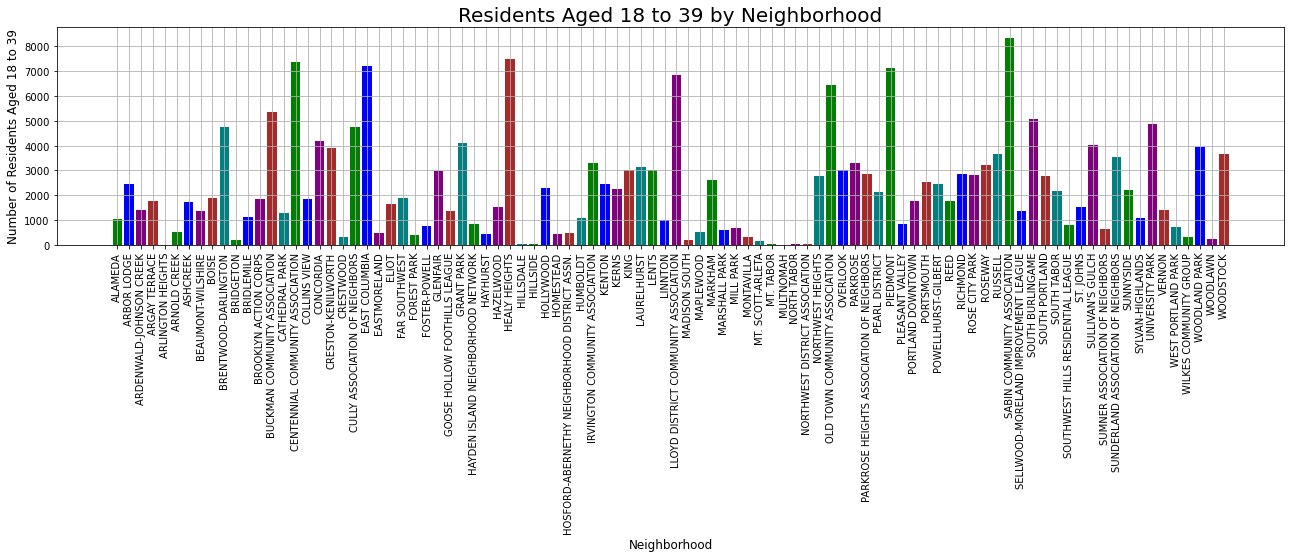

In [5]:
import matplotlib.pyplot as plt
import numpy as np

New_Colors = ['green','blue','purple','brown','teal']
plt.figure(figsize=(22,4))
plt.bar(df['NEIGHBORHOOD'], df['residents aged 18 to 39'], color=New_Colors, linewidth=2)
plt.xticks(rotation=90)
plt.title('Residents Aged 18 to 39 by Neighborhood', fontsize=20)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Residents Aged 18 to 39', fontsize=12)
plt.grid(True)
plt.show()



At a glance, we can see five neighborhoods with more than 7,000 residents between the ages of 18 and 39. If we sort the values, we can create a data frame that lists the top five neighborhoods and includes their geospatial data.

In [6]:
df.sort_values (by= ['residents aged 18 to 39'], inplace=True, ascending=False)
df5neighborhoods=df.head(5)
df5neighborhoods

,OBJECTID,NEIGHBORHOOD,COMMPLAN,SHARED,COALIT,HORZ_VERT,MAPLABEL,ID,Shape_Length,Shape_Area,Latitude,Longituge,residents aged 18 to 39
75,78,SABIN COMMUNITY ASSOCIATION,ALBINA,,NECN,HORZ,Sabin Community Association,77,7032.510698,2.485402e+06,45.55077,-122.64936,8359
33,82,HEALY HEIGHTS,SOUTHWEST,Y,SWNI,VERT,Healy Heights,38,2863.743901,3.101926e+05,45.49178,-122.6989,7492
15,65,CENTENNIAL COMMUNITY ASSOCIATION,OUTER SE,,EPCO,VERT,Centennial Community Association,15,23520.303580,1.721106e+07,45.50457,-122.49662,7387
21,98,EAST COLUMBIA,,,NPNS,HORZ,East Columbia,25,15397.269130,1.205873e+07,45.59486,-122.6519,7210
65,3,PIEDMONT,ALBINA,,NPNS,VERT,Piedmont,70,10849.327390,6.079530e+06,45.57444,-122.67073,7114


In [9]:
neighborhood_data = df5neighborhoods.to_csv('fiveneighborhoods.csv', index = False)

Next, we will create a map of Portland and include markers to include the top-five neighborhoods that we'll examine more carefully.

In [10]:
# We will find the latitude and longtitude of Portland, Oregon.
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="washburn.robyn@gmail.com")
location = geolocator.geocode("Portland, Oregon")
print(location.address)
print("Latitude = ", location.latitude, "\n")
print("Longitude = ", location.longitude)

Portland, Multnomah County, Oregon, United States
Latitude =  45.5202471 

Longitude =  -122.6741949


In [11]:

# We'll import the necessary libraries to visualize the data. 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [13]:
# We will map the location of Portland, Oregon and plot top 5 neighborhoods with most residents between ages 18 and 39.
m1=folium.Map(width=600,height=400,location=[45.5202471 , -122.6741949],zoom_start=11,min_zoom=4,max_zoom=20)

for i in range(0,len(df5neighborhoods)):
   folium.Marker(
      location=[df5neighborhoods.iloc[i]['Latitude'], df5neighborhoods.iloc[i]['Longituge']],
      popup=df5neighborhoods.iloc[i]['MAPLABEL'],
   ).add_to(m1)

m1                       

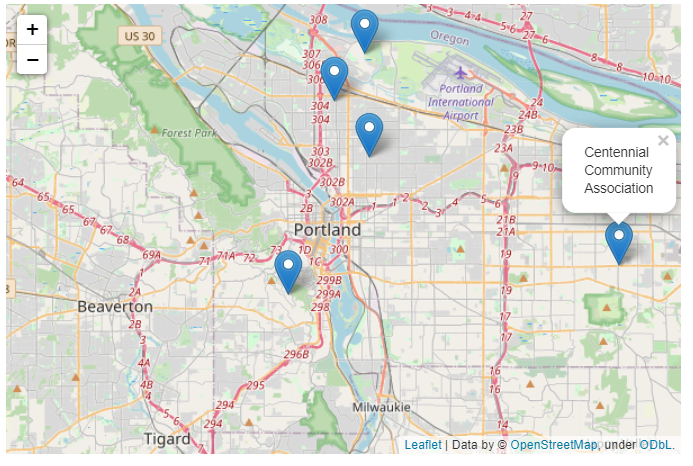

##### Finding Tattoo Parlors in Portland

Now that we have the geospatial and demographic data we need to build our map, we will find all tattoo parlors in Portland, Oregon using the Foursquare API.

In [14]:
CLIENT_ID = 'TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ' # your Foursquare ID
CLIENT_SECRET = 'MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP' # your Foursquare Secret
ACCESS_TOKEN = 'HDYAX5WRBRY252CIAS0WSVOZJAX200BXY45VKI0RYUC2ANKR' # your FourSquare Access Token
VERSION = '20180604'
LATITUDE = '45.5202471'
LONGITUDE = '-122.6741949'
search_query = 'Tattoo Parlor'
radius = 10000
LIMIT = 100
print('Your credentials')

Your credentials


In [15]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, LATITUDE, LONGITUDE, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']


In [16]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, LATITUDE, LONGITUDE, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ&client_secret=MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP&ll=45.5202471,-122.6741949&oauth_token=HDYAX5WRBRY252CIAS0WSVOZJAX200BXY45VKI0RYUC2ANKR&v=20180604&query=Tattoo Parlor&radius=10000&limit=100'

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '61633cce0a17cc58f46d6086'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 1}}],
 'response': {'venues': [{'id': '4cad5ba397c8a1cd37f8a8a5',
    'name': 'Sea Tramp Tattoo Co',
    'location': {'address': '207 SE Grand Ave',
     'lat': 45.52144744803962,
     'lng': -122.66076447974432,
     'labeledLatLngs': [{'label': 'display',
       'lat': 45.52144744803962,
       'lng': -122.66076447974432}],
     'distance': 1056,
     'postalCode': '97214',
     'cc': 'US',
     'city': 'Portland',
     'state': 'OR',
     'country': 'United States',
     'formattedAddress': ['207 SE Grand Ave', 'Portland, OR 97214']},
    'categories': [{'id': '4bf58dd8d48988d1de931735',
      'name': 'Tattoo Parlor',
      'pluralName': 'Tattoo Parlors',
      'shortName': 'Tattoo',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/tattoos_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1633893583',


In [18]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,4cad5ba397c8a1cd37f8a8a5,Sea Tramp Tattoo Co,"[{'id': '4bf58dd8d48988d1de931735', 'name': 'T...",v-1633893583,False,207 SE Grand Ave,45.521447,-122.660764,"[{'label': 'display', 'lat': 45.52144744803962...",1056,97214,US,Portland,OR,United States,"[207 SE Grand Ave, Portland, OR 97214]",NaN,NaN
1,53bda481498e8c36e17012b7,The Tonsorial Parlor,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1633893583,False,411 SW 3rd Ave,45.520056,-122.674227,"[{'label': 'display', 'lat': 45.520056, 'lng':...",21,97204,US,Portland,OR,United States,"[411 SW 3rd Ave (Stark), Portland, OR 97204]",Stark,NaN
2,5387cea6498e636caeb78a01,Thoughtcrime Tattoo,"[{'id': '4bf58dd8d48988d1de931735', 'name': 'T...",v-1633893583,False,420 SW Washington St #601,45.520030,-122.676553,"[{'label': 'display', 'lat': 45.52002963900803...",185,97204,US,Portland,OR,United States,"[420 SW Washington St #601 (SW 4th ave.), Port...",SW 4th ave.,87066024
3,508b4a6ee4b0f38c0067880b,Ever True Tattoo,"[{'id': '4bf58dd8d48988d1de931735', 'name': 'T...",v-1633893583,False,NaN,45.522205,-122.672429,"[{'label': 'display', 'lat': 45.522205, 'lng':...",257,97204,US,Portland,OR,United States,"[Portland, OR 97204]",NaN,NaN
4,4b49332ef964a520d56926e3,Lady Luck Tattoo,"[{'id': '4bf58dd8d48988d1de931735', 'name': 'T...",v-1633893583,False,611 SE Morrison St,45.517348,-122.659408,"[{'label': 'display', 'lat': 45.51734811611305...",1197,97214,US,Portland,OR,United States,"[611 SE Morrison St (btwn SE 6th and 7th St.),...",btwn SE 6th and 7th St.,NaN


In [19]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Sea Tramp Tattoo Co,Tattoo Parlor,207 SE Grand Ave,45.521447,-122.660764,"[{'label': 'display', 'lat': 45.52144744803962...",1056,97214,US,Portland,OR,United States,"[207 SE Grand Ave, Portland, OR 97214]",NaN,4cad5ba397c8a1cd37f8a8a5
1,The Tonsorial Parlor,Salon / Barbershop,411 SW 3rd Ave,45.520056,-122.674227,"[{'label': 'display', 'lat': 45.520056, 'lng':...",21,97204,US,Portland,OR,United States,"[411 SW 3rd Ave (Stark), Portland, OR 97204]",Stark,53bda481498e8c36e17012b7
2,Thoughtcrime Tattoo,Tattoo Parlor,420 SW Washington St #601,45.520030,-122.676553,"[{'label': 'display', 'lat': 45.52002963900803...",185,97204,US,Portland,OR,United States,"[420 SW Washington St #601 (SW 4th ave.), Port...",SW 4th ave.,5387cea6498e636caeb78a01
3,Ever True Tattoo,Tattoo Parlor,NaN,45.522205,-122.672429,"[{'label': 'display', 'lat': 45.522205, 'lng':...",257,97204,US,Portland,OR,United States,"[Portland, OR 97204]",NaN,508b4a6ee4b0f38c0067880b
4,Lady Luck Tattoo,Tattoo Parlor,611 SE Morrison St,45.517348,-122.659408,"[{'label': 'display', 'lat': 45.51734811611305...",1197,97214,US,Portland,OR,United States,"[611 SE Morrison St (btwn SE 6th and 7th St.),...",btwn SE 6th and 7th St.,4b49332ef964a520d56926e3
5,Pearl Tattoo Studio,Tattoo Parlor,1255 NW 9th Ave Apt 13,45.531700,-122.680794,"[{'label': 'display', 'lat': 45.53170013427734...",1374,97209,US,Portland,OR,United States,"[1255 NW 9th Ave Apt 13 (NW Overton), Portland...",NW Overton,4d706acdcbc58cfa47ec7172
6,Tattoo Smile,Tattoo Parlor,1990 SE Ladd Ave,45.508022,-122.649010,"[{'label': 'display', 'lat': 45.508022, 'lng':...",2389,97214,US,Portland,OR,United States,"[1990 SE Ladd Ave, Portland, OR 97214]",NaN,61099832d3070f6308417c62
7,Tattoo 34,Tattoo Parlor,NaN,45.511966,-122.629269,"[{'label': 'display', 'lat': 45.511966, 'lng':...",3623,97214,US,Portland,OR,United States,"[Portland, OR 97214]",NaN,5b37f28182a750003934fdac
8,Scapegoat Tattoo,Tattoo Parlor,1223 SE Stark St,45.519443,-122.653104,"[{'label': 'display', 'lat': 45.51944333788997...",1647,97214,US,Portland,OR,United States,"[1223 SE Stark St, Portland, OR 97214]",NaN,4aa9570cf964a520295320e3
9,Outside In Tattoo Removal Clinic,None,NaN,45.525628,-122.678053,"[{'label': 'display', 'lat': 45.525628, 'lng':...",670,NaN,US,NaN,NaN,United States,NaN,NaN,4b6f1b50f964a52066dd2ce3


In [20]:
dataframe_filtered_data = dataframe_filtered.to_csv('tattoo.csv', index = False)

##### Visualation of Tattoo Parlors in Proximity to the Neighborhoods Where the Most People Aged 18 to 39 Live

Through the foursquare API, we found 50 tattoo parlors in the Portland area.

We will create a map of Portland that includes blue markers showing where the top-five of neighborhoods with residents between the ages of 18 and 39 and red markers showing the locations of the tattoo parlors that were found on FourSquare.

In [23]:
tattoo_map = folium.Map(width=550,height=550,location=[45.5202471 , -122.6741949],zoom_start=11,min_zoom=4,max_zoom=20)

# add blue markers to represent the neighborhoods in Portland that have the most people aged 18 to 39

for i in range(0,len(df5neighborhoods)):
   folium.Marker(
      location=[df5neighborhoods.iloc[i]['Latitude'], df5neighborhoods.iloc[i]['Longituge']],
      popup=df5neighborhoods.iloc[i]['MAPLABEL'],
   ).add_to(tattoo_map)
    
# adding all tattoo parlors as red circle markers
for lat, lng, name, cate, addr, dist in zip(dataframe_filtered.lat,dataframe_filtered.lng,dataframe_filtered.name,dataframe_filtered.categories,dataframe_filtered.address,dataframe_filtered.distance):

    folium.CircleMarker(location=[lat,lng],radius=5,color="red",fill=True,fill_color="red",
                       popup= folium.Popup(('<strong><font color ="red">Name :     </font>'+name+'</strong><br>'), max_width=250)).add_to(tattoo_map)
    

# display map
tattoo_map


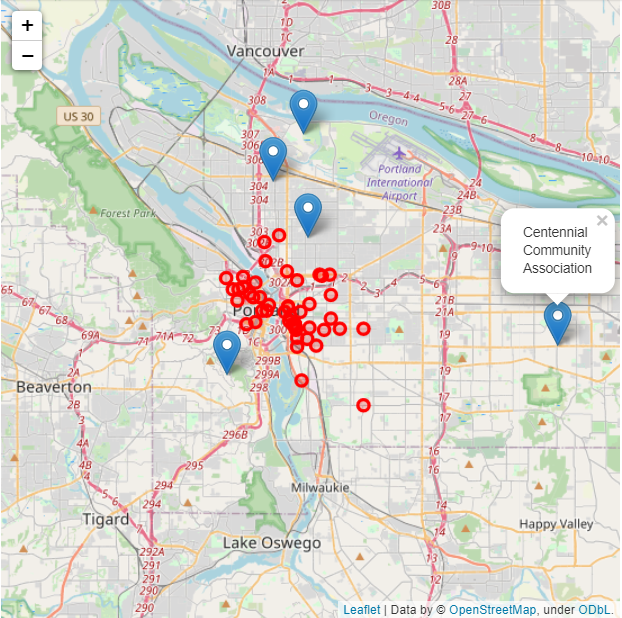

Upon reviewing the map, a few observations can be made. First, most tattoo parlors are heavily concentrated within the city center. Second, three of the neighborhoods marked on the map are close to the city center. Third, two of the neighborhoods marked on the map are farther away from the tattoo parlors on the map. The Centennial neighborhood has third largest number of residents within the age group we have targeted and is the farthest away from current tattoo parlors. East Columbia has fourth largest number of residents we have targeted and is the second farthest away from tattoo parlors mapped. We will use FourSquare data to learn more about each neighborhood to see what types of venues are currently in business.

##### Searching for Venues in Each of the Top Five Neighborhoods

In [24]:
# We'll import the necessary libraries to visualize the data. 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


##### Sabin Neighborhood

In [26]:
CLIENT_ID = 'TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ' # your Foursquare ID
CLIENT_SECRET = 'MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP' # your Foursquare Secret
ACCESS_TOKEN = 'HDYAX5WRBRY252CIAS0WSVOZJAX200BXY45VKI0RYUC2ANKR' # your FourSquare Access Token
VERSION = '20180604'
LATITUDE = '45.55077'
LONGITUDE = '-122.64936'
radius = 500
LIMIT = 100
print('Your credentials')

Your credentials


In [27]:
url  = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, LATITUDE, LONGITUDE, VERSION, radius, LIMIT)

url


'https://api.foursquare.com/v2/venues/explore?client_id=TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ&client_secret=MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP&ll=45.55077,-122.64936&v=20180604&radius=500&limit=100'

In [28]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '61633e66fc31b318ae2abd3c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Sabin',
  'headerFullLocation': 'Sabin, Portland',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 15,
  'suggestedBounds': {'ne': {'lat': 45.5552700045, 'lng': -122.6429459629338},
   'sw': {'lat': 45.5462699955, 'lng': -122.65577403706621}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a7deb91f964a52031f01fe3',
       'name': 'Whole Foods Market',
       'location': {'address': '3535 Ne 15th Ave.',
        'crossStreet': 'at NE Fremont St',
        'lat': 45.548998175617946,
        'lng': -122.65128528997215

In [29]:
'There are {} businesses around the Sabin Neighborhood.'.format(len(results['response']['groups'][0]['items']))

'There are 15 businesses around the Sabin Neighborhood.'

In [30]:
# assign relevant part of JSON to venues
venues = results['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,venue.location.neighborhood
0,e-0-4a7deb91f964a52031f01fe3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4a7deb91f964a52031f01fe3,Whole Foods Market,3535 Ne 15th Ave.,at NE Fremont St,45.548998,-122.651285,"[{'label': 'display', 'lat': 45.54899817561794...",247,97212,US,Portland,OR,United States,"[3535 Ne 15th Ave. (at NE Fremont St), Portlan...","[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e-0-4c9937eaa004a1cdf4db3d6e-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c9937eaa004a1cdf4db3d6e,Sugar Me,1313 NE Fremont St,NaN,45.548352,-122.652452,"[{'label': 'display', 'lat': 45.54835241686896...",361,97212,US,Portland,OR,United States,"[1313 NE Fremont St, Portland, OR 97212, Unite...","[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",0,[],226317954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e-0-549724e3498e855d5f8263c8-2,0,"[{'summary': 'This spot is popular', 'type': '...",549724e3498e855d5f8263c8,Verdigris,1315 NE Fremont St,NaN,45.548344,-122.652411,"[{'label': 'display', 'lat': 45.54834439827950...",359,97212,US,Portland,OR,United States,"[1315 NE Fremont St, Portland, OR 97212, Unite...","[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e-0-4af4aca5f964a520f8f421e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4af4aca5f964a520f8f421e3,Backyard Bird Shop,1419 NE Fremont St,at NE 14th,45.548882,-122.651358,"[{'label': 'display', 'lat': 45.548882, 'lng':...",261,97212,US,Portland,OR,United States,"[1419 NE Fremont St (at NE 14th), Portland, OR...","[{'id': '4eb1c0253b7b52c0e1adc2e9', 'name': 'G...",0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e-0-4f8f2fb6e4b05ce336d6e5ff-4,0,"[{'summary': 'This spot is popular', 'type': '...",4f8f2fb6e4b05ce336d6e5ff,Beanstalk Children's Resale Clothing,3527 NE 15th Ave,NaN,45.548882,-122.651358,"[{'label': 'display', 'lat': 45.548882, 'lng':...",261,97212,US,Portland,OR,United States,"[3527 NE 15th Ave, Portland, OR 97212, United ...","[{'id': '4bf58dd8d48988d105951735', 'name': 'K...",0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id,categories
0,Whole Foods Market,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",3535 Ne 15th Ave.,at NE Fremont St,45.548998,-122.651285,"[{'label': 'display', 'lat': 45.54899817561794...",247,97212,US,Portland,OR,United States,"[3535 Ne 15th Ave. (at NE Fremont St), Portlan...",NaN,4a7deb91f964a52031f01fe3,Grocery Store
1,Sugar Me,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",1313 NE Fremont St,NaN,45.548352,-122.652452,"[{'label': 'display', 'lat': 45.54835241686896...",361,97212,US,Portland,OR,United States,"[1313 NE Fremont St, Portland, OR 97212, Unite...",NaN,4c9937eaa004a1cdf4db3d6e,Cosmetics Shop
2,Verdigris,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",1315 NE Fremont St,NaN,45.548344,-122.652411,"[{'label': 'display', 'lat': 45.54834439827950...",359,97212,US,Portland,OR,United States,"[1315 NE Fremont St, Portland, OR 97212, Unite...",NaN,549724e3498e855d5f8263c8,French Restaurant
3,Backyard Bird Shop,"[{'id': '4eb1c0253b7b52c0e1adc2e9', 'name': 'G...",1419 NE Fremont St,at NE 14th,45.548882,-122.651358,"[{'label': 'display', 'lat': 45.548882, 'lng':...",261,97212,US,Portland,OR,United States,"[1419 NE Fremont St (at NE 14th), Portland, OR...",NaN,4af4aca5f964a520f8f421e3,Garden Center
4,Beanstalk Children's Resale Clothing,"[{'id': '4bf58dd8d48988d105951735', 'name': 'K...",3527 NE 15th Ave,NaN,45.548882,-122.651358,"[{'label': 'display', 'lat': 45.548882, 'lng':...",261,97212,US,Portland,OR,United States,"[3527 NE 15th Ave, Portland, OR 97212, United ...",NaN,4f8f2fb6e4b05ce336d6e5ff,Kids Store
5,Caffé Destino,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",1339 NE Fremont St,at NE 14th Ave.,45.548356,-122.651980,"[{'label': 'display', 'lat': 45.54835608195407...",337,97212,US,Portland,OR,United States,"[1339 NE Fremont St (at NE 14th Ave.), Portlan...",NaN,4a73219af964a520a1db1fe3,Café
6,Papa Murphy's,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",3523 NE 15th Ave,at NE Fremont St,45.548658,-122.651179,"[{'label': 'display', 'lat': 45.54865805087382...",274,97212,US,Portland,OR,United States,"[3523 NE 15th Ave (at NE Fremont St), Portland...",NaN,4a9892abf964a520bf2c20e3,Pizza Place
7,Acadia,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",1303 NE Fremont St,NaN,45.548373,-122.652601,"[{'label': 'display', 'lat': 45.54837297175885...",367,97212,US,Portland,OR,United States,"[1303 NE Fremont St, Portland, OR 97212, Unite...",NaN,41f43a80f964a520201f1fe3,Lounge
8,Mojo Sushi,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",1501 NE Fremont St,15th Ave,45.548351,-122.650162,"[{'label': 'display', 'lat': 45.54835122806887...",276,97212,US,Portland,OR,United States,"[1501 NE Fremont St (15th Ave), Portland, OR 9...",NaN,4cd0b8fb6200b1f71925d628,Sushi Restaurant
9,Free House Bar,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",1328 NE Fremont,NE 13th,45.548363,-122.652205,"[{'label': 'display', 'lat': 45.5483627680421,...",347,NaN,US,Portland,OR,United States,"[1328 NE Fremont (NE 13th), Portland, OR, Unit...",NaN,4ae8e471f964a52022b321e3,Bar


In [32]:
sabin_csv_data = dataframe_filtered.to_csv('businesses_1.csv', index = False)

##### Healy Heights

In [33]:
CLIENT_ID = 'TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ' # your Foursquare ID
CLIENT_SECRET = 'MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP' # your Foursquare Secret
ACCESS_TOKEN = 'HDYAX5WRBRY252CIAS0WSVOZJAX200BXY45VKI0RYUC2ANKR' # your FourSquare Access Token
VERSION = '20180604'
LATITUDE = '45.49178'
LONGITUDE = '-122.6989 '
radius = 500
LIMIT = 100
print('Your credentials')

Your credentials


In [34]:
url  = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, LATITUDE, LONGITUDE, VERSION, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?client_id=TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ&client_secret=MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP&ll=45.49178,-122.6989 &v=20180604&radius=500&limit=100'

In [35]:
results2 = requests.get(url).json()
results2

{'meta': {'code': 200, 'requestId': '61633efc67661e7e658d2da8'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Southwest Hills',
  'headerFullLocation': 'Southwest Hills, Portland',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 45.4962800045, 'lng': -122.69249268437619},
   'sw': {'lat': 45.487279995499996, 'lng': -122.7053073156238}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c82bdf3d4e2370470c46a88',
       'name': 'Healy Heights Park',
       'location': {'lat': 45.49271565938721,
        'lng': -122.69873509491713,
        'labeledLatLngs': [{'label': 'display',
          'lat'

In [36]:
'There are {} businesses around the Healy Heights Neighborhood.'.format(len(results2['response']['groups'][0]['items']))


'There are 2 businesses around the Healy Heights Neighborhood.'

In [37]:
# assign relevant part of JSON to venues
venues2 = results2['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe2 = pd.json_normalize(venues2)
dataframe2.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups
0,e-0-4c82bdf3d4e2370470c46a88-0,0,"[{'summary': 'This spot is popular', 'type': '...",4c82bdf3d4e2370470c46a88,Healy Heights Park,45.492716,-122.698735,"[{'label': 'display', 'lat': 45.49271565938721...",104,97239,US,Portland,OR,United States,"[Portland, OR 97239, United States]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[]
1,e-0-57336d94498e43167dbd3430-1,0,"[{'summary': 'This spot is popular', 'type': '...",57336d94498e43167dbd3430,Fairmount Loop,45.493604,-122.696241,"[{'label': 'display', 'lat': 45.493604, 'lng':...",290,NaN,US,Portland,OR,United States,"[Portland, OR, United States]","[{'id': '4bf58dd8d48988d159941735', 'name': 'T...",0,[]


In [38]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns2 = ['venue.name', 'venue.categories'] + [col for col in dataframe2.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered2 = dataframe2.loc[:, filtered_columns2]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list2 = row['categories']
    except:
        categories_list2 = row['venue.categories']
        
    if len(categories_list2) == 0:
        return None
    else:
        return categories_list2[0]['name']

# filter the category for each row
dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]

dataframe_filtered2

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,categories
0,Healy Heights Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",45.492716,-122.698735,"[{'label': 'display', 'lat': 45.49271565938721...",104,97239,US,Portland,OR,United States,"[Portland, OR 97239, United States]",4c82bdf3d4e2370470c46a88,Park
1,Fairmount Loop,"[{'id': '4bf58dd8d48988d159941735', 'name': 'T...",45.493604,-122.696241,"[{'label': 'display', 'lat': 45.493604, 'lng':...",290,NaN,US,Portland,OR,United States,"[Portland, OR, United States]",57336d94498e43167dbd3430,Trail


In [39]:
healy_csv_data = dataframe_filtered2.to_csv('businesses_2.csv', index = False)

##### Centennial Neighborhood

In [40]:
CLIENT_ID = 'TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ' # your Foursquare ID
CLIENT_SECRET = 'MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP' # your Foursquare Secret
ACCESS_TOKEN = 'HDYAX5WRBRY252CIAS0WSVOZJAX200BXY45VKI0RYUC2ANKR' # your FourSquare Access Token
VERSION = '20180604'
LATITUDE = '45.50457'
LONGITUDE = '-122.49662'
radius = 500
LIMIT = 100
print('Your credentials')

Your credentials


In [41]:
url  = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, LATITUDE, LONGITUDE, VERSION, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?client_id=TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ&client_secret=MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP&ll=45.50457,-122.49662&v=20180604&radius=500&limit=100'

In [42]:
results3 = requests.get(url).json()
results3

{'meta': {'code': 200, 'requestId': '61633fa5094e8a5995ff3e53'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Centennial',
  'headerFullLocation': 'Centennial, Portland',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 14,
  'suggestedBounds': {'ne': {'lat': 45.5090700045, 'lng': -122.49021122883018},
   'sw': {'lat': 45.5000699955, 'lng': -122.50302877116981}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c8c87c855fba093a1a360ab',
       'name': 'Fortune Star Lounge',
       'location': {'address': '15920 SE Division St',
        'lat': 45.50411316024861,
        'lng': -122.49933537688845,
        'labeledLatLngs': [{'label': 'display',
          'lat': 45

In [43]:
'There are {} businesses around the Centennial Neighborhood.'.format(len(results3['response']['groups'][0]['items']))

'There are 14 businesses around the Centennial Neighborhood.'

In [44]:
# assign relevant part of JSON to venues
venues3 = results3['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe3 = pd.json_normalize(venues3)
dataframe3.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,venue.photos.count,venue.photos.groups,venue.events.count,venue.events.summary,venue.venuePage.id,venue.location.crossStreet
0,e-0-4c8c87c855fba093a1a360ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",4c8c87c855fba093a1a360ab,Fortune Star Lounge,15920 SE Division St,45.504113,-122.499335,"[{'label': 'display', 'lat': 45.50411316024861...",217,97236,US,Portland,OR,United States,"[15920 SE Division St, Portland, OR 97236, Uni...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",2009970,https://www.grubhub.com/restaurant/fortune-sta...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,0,[],NaN,NaN,NaN,NaN
1,e-0-4ad60cf8f964a520ce0421e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ad60cf8f964a520ce0421e3,Regal Division Street,16603 SE Division St.,45.505810,-122.492422,"[{'label': 'display', 'lat': 45.50581, 'lng': ...",355,97236,US,Portland,OR,United States,"[16603 SE Division St., Portland, OR 97236, Un...","[{'id': '4bf58dd8d48988d17f941735', 'name': 'M...",NaN,NaN,NaN,NaN,NaN,NaN,0,[],7.0,7 movies,NaN,NaN
2,e-0-4b539fc9f964a52024a527e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b539fc9f964a52024a527e3,Burgerville,16211 SE Division St,45.504920,-122.496330,"[{'label': 'display', 'lat': 45.50491971744637...",45,97236,US,Portland,OR,United States,"[16211 SE Division St, Portland, OR 97236, Uni...","[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,0,[],NaN,NaN,NaN,NaN
3,e-0-4c897ce052a98cfadd8424e9-3,0,"[{'summary': 'This spot is popular', 'type': '...",4c897ce052a98cfadd8424e9,Les Schwab Tire Center,16650 SE Division St,45.504122,-122.491644,"[{'label': 'display', 'lat': 45.50412199999999...",391,97236,US,Portland,OR,United States,"[16650 SE Division St, Portland, OR 97236, Uni...","[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",NaN,NaN,NaN,NaN,NaN,NaN,0,[],NaN,NaN,571173223,NaN
4,e-0-4bd866c05cf276b0ac229d00-4,0,"[{'summary': 'This spot is popular', 'type': '...",4bd866c05cf276b0ac229d00,U.S. Bank ATM,16002 SE Division St,45.504089,-122.497330,"[{'label': 'display', 'lat': 45.50408935546875...",76,97236,US,Portland,OR,United States,"[16002 SE Division St, Portland, OR 97236, Uni...","[{'id': '52f2ab2ebcbc57f1066b8b56', 'name': 'A...",NaN,NaN,NaN,NaN,NaN,NaN,0,[],NaN,NaN,NaN,NaN


In [45]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns3 = ['venue.name', 'venue.categories'] + [col for col in dataframe3.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered3 = dataframe3.loc[:, filtered_columns3]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list3 = row['categories']
    except:
        categories_list3 = row['venue.categories']
        
    if len(categories_list3) == 0:
        return None
    else:
        return categories_list3[0]['name']

# filter the category for each row
dataframe_filtered3['categories'] = dataframe_filtered3.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered3.columns = [column.split('.')[-1] for column in dataframe_filtered3.columns]

dataframe_filtered3

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id,categories
0,Fortune Star Lounge,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",15920 SE Division St,45.504113,-122.499335,"[{'label': 'display', 'lat': 45.50411316024861...",217,97236,US,Portland,OR,United States,"[15920 SE Division St, Portland, OR 97236, Uni...",NaN,4c8c87c855fba093a1a360ab,Bar
1,Regal Division Street,"[{'id': '4bf58dd8d48988d17f941735', 'name': 'M...",16603 SE Division St.,45.505810,-122.492422,"[{'label': 'display', 'lat': 45.50581, 'lng': ...",355,97236,US,Portland,OR,United States,"[16603 SE Division St., Portland, OR 97236, Un...",NaN,4ad60cf8f964a520ce0421e3,Movie Theater
2,Burgerville,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",16211 SE Division St,45.504920,-122.496330,"[{'label': 'display', 'lat': 45.50491971744637...",45,97236,US,Portland,OR,United States,"[16211 SE Division St, Portland, OR 97236, Uni...",NaN,4b539fc9f964a52024a527e3,Burger Joint
3,Les Schwab Tire Center,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",16650 SE Division St,45.504122,-122.491644,"[{'label': 'display', 'lat': 45.50412199999999...",391,97236,US,Portland,OR,United States,"[16650 SE Division St, Portland, OR 97236, Uni...",NaN,4c897ce052a98cfadd8424e9,Automotive Shop
4,U.S. Bank ATM,"[{'id': '52f2ab2ebcbc57f1066b8b56', 'name': 'A...",16002 SE Division St,45.504089,-122.497330,"[{'label': 'display', 'lat': 45.50408935546875...",76,97236,US,Portland,OR,United States,"[16002 SE Division St, Portland, OR 97236, Uni...",NaN,4bd866c05cf276b0ac229d00,ATM
5,Little Caesars Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",16353 SE Division St,45.506013,-122.495093,"[{'label': 'display', 'lat': 45.506013, 'lng':...",199,97236,US,Portland,OR,United States,"[16353 SE Division St, Portland, OR 97236, Uni...",NaN,52f543dd11d242eeca9aa42f,Pizza Place
6,Ross Dress for Less,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",16339 SE Division Street,45.506116,-122.496121,"[{'label': 'display', 'lat': 45.506116, 'lng':...",176,97236,US,Portland,OR,United States,"[16339 SE Division Street, Portland, OR 97236,...",NaN,53474ee0498ef2384a3cbc62,Clothing Store
7,Subway,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",16409 SE Division St Ste 208,45.505560,-122.493871,"[{'label': 'display', 'lat': 45.50556003603361...",241,97236,US,Portland,OR,United States,"[16409 SE Division St Ste 208 (at 162nd), Port...",at 162nd,4bbce1788ec3d13ad45d1b28,Sandwich Place
8,Rite Aid,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",16401 SE Division St,45.506079,-122.494375,"[{'label': 'display', 'lat': 45.5060787, 'lng'...",242,97236,US,Portland,OR,United States,"[16401 SE Division St (162nd), Portland, OR 97...",162nd,4bd5d8406798ef3bb015648d,Pharmacy
9,Disc Heroes,"[{'id': '4bf58dd8d48988d1fb941735', 'name': 'H...",2614 SE 162nd Ave,45.503311,-122.496300,"[{'label': 'display', 'lat': 45.503311, 'lng':...",142,97236,US,Portland,OR,United States,"[2614 SE 162nd Ave, Portland, OR 97236, United...",NaN,528d6c6911d2eb86c160380a,Hobby Shop


In [46]:
centennial_csv_data = dataframe_filtered3.to_csv('businesses_3.csv', index = False)

##### East Columbia

In [47]:
CLIENT_ID = 'TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ' # your Foursquare ID
CLIENT_SECRET = 'MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP' # your Foursquare Secret
ACCESS_TOKEN = 'HDYAX5WRBRY252CIAS0WSVOZJAX200BXY45VKI0RYUC2ANKR' # your FourSquare Access Token
VERSION = '20180604'
LATITUDE = '45.59486'
LONGITUDE = '-122.6519'
radius = 500
LIMIT = 100
print('Your credentials')

Your credentials


In [48]:
url  = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, LATITUDE, LONGITUDE, VERSION, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?client_id=TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ&client_secret=MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP&ll=45.59486,-122.6519&v=20180604&radius=500&limit=100'

In [49]:
results4 = requests.get(url).json()
results4

{'meta': {'code': 200, 'requestId': '616340267e351c2a572d6ee6'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'North Portland',
  'headerFullLocation': 'North Portland, Portland',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 45.5993600045, 'lng': -122.64548092556481},
   'sw': {'lat': 45.590359995499995, 'lng': -122.65831907443518}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bbe37888ca376b04d7fc77a',
       'name': 'Chez Traveler West',
       'location': {'lat': 45.596826,
        'lng': -122.652483,
        'labeledLatLngs': [{'label': 'display',
          'lat': 45.596826,
    

In [50]:
'There are {} businesses around the East Columbia Neighborhood.'.format(len(results4['response']['groups'][0]['items']))

'There are 2 businesses around the East Columbia Neighborhood.'

In [51]:
# assign relevant part of JSON to venues
venues4 = results4['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe4 = pd.json_normalize(venues4)
dataframe4.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups
0,e-0-4bbe37888ca376b04d7fc77a-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bbe37888ca376b04d7fc77a,Chez Traveler West,45.596826,-122.652483,"[{'label': 'display', 'lat': 45.596826, 'lng':...",223,97211,US,Portland,OR,United States,"[Portland, OR 97211, United States]","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[]
1,e-0-5501e786498e7ad15c708584-1,0,"[{'summary': 'This spot is popular', 'type': '...",5501e786498e7ad15c708584,stan chilton auto body,45.596274,-122.654517,"[{'label': 'display', 'lat': 45.596274, 'lng':...",257,NaN,US,Portland,OR,United States,"[Portland, OR, United States]","[{'id': '52f2ab2ebcbc57f1066b8b44', 'name': 'A...",0,[]


In [52]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns4 = ['venue.name', 'venue.categories'] + [col for col in dataframe4.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered4 = dataframe4.loc[:, filtered_columns4]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list4 = row['categories']
    except:
        categories_list4 = row['venue.categories']
        
    if len(categories_list4) == 0:
        return None
    else:
        return categories_list4[0]['name']

# filter the category for each row
dataframe_filtered4['categories'] = dataframe_filtered4.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered4.columns = [column.split('.')[-1] for column in dataframe_filtered4.columns]

dataframe_filtered4

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,categories
0,Chez Traveler West,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",45.596826,-122.652483,"[{'label': 'display', 'lat': 45.596826, 'lng':...",223,97211,US,Portland,OR,United States,"[Portland, OR 97211, United States]",4bbe37888ca376b04d7fc77a,Hotel
1,stan chilton auto body,"[{'id': '52f2ab2ebcbc57f1066b8b44', 'name': 'A...",45.596274,-122.654517,"[{'label': 'display', 'lat': 45.596274, 'lng':...",257,NaN,US,Portland,OR,United States,"[Portland, OR, United States]",5501e786498e7ad15c708584,Auto Garage


In [53]:
eastcolumbia_csv_data = dataframe_filtered4.to_csv('businesses_4.csv', index = False)

##### Piedmont Neighborhood

In [54]:
CLIENT_ID = 'TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ' # your Foursquare ID
CLIENT_SECRET = 'MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP' # your Foursquare Secret
ACCESS_TOKEN = 'HDYAX5WRBRY252CIAS0WSVOZJAX200BXY45VKI0RYUC2ANKR' # your FourSquare Access Token
VERSION = '20180604'
LATITUDE = '45.57444'
LONGITUDE = '-122.67073'
radius = 500
LIMIT = 100
print('Your credentials')

Your credentials


In [55]:
url  = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, LATITUDE, LONGITUDE, VERSION, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?client_id=TUDT3RFTLZZ0Q5DD00GACLY2K4UQRNBWHMVIGVGHZZG0X2OQ&client_secret=MNGUHNMPELGKBAB532TILPFNYVSXCVYTTU4QV33OCTV53VVP&ll=45.57444,-122.67073&v=20180604&radius=500&limit=100'

In [56]:
results5 = requests.get(url).json()
results5

{'meta': {'code': 200, 'requestId': '6163409579b7fe22dce23aa8'},
 'response': {'headerLocation': 'Piedmont',
  'headerFullLocation': 'Piedmont, Portland',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': 45.578940004500005,
    'lng': -122.66431326004557},
   'sw': {'lat': 45.5699399955, 'lng': -122.67714673995444}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55622b87498e84500b920a8e',
       'name': 'Black Rock Coffee Bar',
       'location': {'address': '7434 N Vancouver Ave',
        'crossStreet': 'at N Lombard St',
        'lat': 45.57704207966763,
        'lng': -122.66815513372421,
        'labeledLatLngs': [{'label': 'display',
          'lat': 45.57704207966763,
          'lng': -122.66815513372421}],
 

In [57]:
'There are {} businesses around the Piedmont Neighborhood.'.format(len(results5['response']['groups'][0]['items']))

'There are 7 businesses around the Piedmont Neighborhood.'

In [58]:
# assign relevant part of JSON to venues
venues5 = results5['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe5 = pd.json_normalize(venues5)
dataframe5.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,venue.photos.count,venue.photos.groups
0,e-0-55622b87498e84500b920a8e-0,0,"[{'summary': 'This spot is popular', 'type': '...",55622b87498e84500b920a8e,Black Rock Coffee Bar,7434 N Vancouver Ave,at N Lombard St,45.577042,-122.668155,"[{'label': 'display', 'lat': 45.57704207966763...",352,97217,US,Portland,OR,United States,"[7434 N Vancouver Ave (at N Lombard St), Portl...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",2917897,https://www.grubhub.com/restaurant/black-rock-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,0,[]
1,e-0-4b20a60df964a5209c3324e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b20a60df964a5209c3324e3,Javier's Tacos,121 N Lombard St,at N Vancouver Ave,45.577324,-122.668192,"[{'label': 'display', 'lat': 45.57732382067402...",377,97217,US,Portland,OR,United States,"[121 N Lombard St (at N Vancouver Ave), Portla...","[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",2326633,https://www.grubhub.com/restaurant/javiers-tac...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,0,[]
2,e-0-572c2f6b498e0986562f8d9b-2,0,"[{'summary': 'This spot is popular', 'type': '...",572c2f6b498e0986562f8d9b,Mi Burrito,819 N Lombard St,NaN,45.577327,-122.675357,"[{'label': 'display', 'lat': 45.57732744542051...",483,97217,US,Portland,OR,United States,"[819 N Lombard St, Portland, OR 97217, United ...","[{'id': '4bf58dd8d48988d153941735', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,0,[]
3,e-0-4b0fc8aff964a520e06423e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4b0fc8aff964a520e06423e3,Eagle Portland,835 N Lombard St,NaN,45.577393,-122.675546,"[{'label': 'display', 'lat': 45.57739337153448...",498,97217,US,Portland,OR,United States,"[835 N Lombard St, Portland, OR 97217, United ...","[{'id': '4bf58dd8d48988d1d8941735', 'name': 'G...",NaN,NaN,NaN,NaN,NaN,NaN,0,[]
4,e-0-4b414e76f964a5200bc525e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b414e76f964a5200bc525e3,Ed's Market,207 N Lombard St,N Vancouver,45.577520,-122.668909,"[{'label': 'display', 'lat': 45.57752, 'lng': ...",371,97217,US,Portland,OR,United States,"[207 N Lombard St (N Vancouver), Portland, OR ...","[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",NaN,NaN,NaN,NaN,NaN,NaN,0,[]


In [59]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns5 = ['venue.name', 'venue.categories'] + [col for col in dataframe5.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered5 = dataframe5.loc[:, filtered_columns5]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list5 = row['categories']
    except:
        categories_list5 = row['venue.categories']
        
    if len(categories_list5) == 0:
        return None
    else:
        return categories_list5[0]['name']

# filter the category for each row
dataframe_filtered5['categories'] = dataframe_filtered5.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered5.columns = [column.split('.')[-1] for column in dataframe_filtered5.columns]

dataframe_filtered5

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id,categories
0,Black Rock Coffee Bar,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",7434 N Vancouver Ave,at N Lombard St,45.577042,-122.668155,"[{'label': 'display', 'lat': 45.57704207966763...",352,97217,US,Portland,OR,United States,"[7434 N Vancouver Ave (at N Lombard St), Portl...",55622b87498e84500b920a8e,Coffee Shop
1,Javier's Tacos,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",121 N Lombard St,at N Vancouver Ave,45.577324,-122.668192,"[{'label': 'display', 'lat': 45.57732382067402...",377,97217,US,Portland,OR,United States,"[121 N Lombard St (at N Vancouver Ave), Portla...",4b20a60df964a5209c3324e3,Mexican Restaurant
2,Mi Burrito,"[{'id': '4bf58dd8d48988d153941735', 'name': 'B...",819 N Lombard St,NaN,45.577327,-122.675357,"[{'label': 'display', 'lat': 45.57732744542051...",483,97217,US,Portland,OR,United States,"[819 N Lombard St, Portland, OR 97217, United ...",572c2f6b498e0986562f8d9b,Burrito Place
3,Eagle Portland,"[{'id': '4bf58dd8d48988d1d8941735', 'name': 'G...",835 N Lombard St,NaN,45.577393,-122.675546,"[{'label': 'display', 'lat': 45.57739337153448...",498,97217,US,Portland,OR,United States,"[835 N Lombard St, Portland, OR 97217, United ...",4b0fc8aff964a520e06423e3,Gay Bar
4,Ed's Market,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",207 N Lombard St,N Vancouver,45.577520,-122.668909,"[{'label': 'display', 'lat': 45.57752, 'lng': ...",371,97217,US,Portland,OR,United States,"[207 N Lombard St (N Vancouver), Portland, OR ...",4b414e76f964a5200bc525e3,Grocery Store
5,Bella Cucina Catering,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",6635 N Commercial Ave,NaN,45.570893,-122.670787,"[{'label': 'display', 'lat': 45.570893, 'lng':...",394,97217,US,Portland,OR,United States,"[6635 N Commercial Ave, Portland, OR 97217, Un...",4f32508e19836c91c7cb935f,Food
6,Acapulco Grill,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",821 N Lombard St,NaN,45.577402,-122.675297,"[{'label': 'display', 'lat': 45.577402, 'lng':...",485,97217,US,Portland,OR,United States,"[821 N Lombard St, Portland, OR 97217, United ...",51bb7630498eba02a3e0f2bb,Mexican Restaurant


In [60]:
piedmont_csv_data = dataframe_filtered5.to_csv('businesses_5.csv', index = False)

##### Combining Neighborhood Data into a Single Data Source

Now that we've seen some detail for each neighborhood's businesses from FourSquare, we will combine the data into a single source to analyze through K-means clustering. Through this tool, we'll get a full visualization of venues by neighborhood.

In [61]:
import pandas as pd
from glob import glob
import os

In [62]:
business_files = sorted(glob('businesses/businesses_*.csv'))
business_files

['businesses\\businesses_1.csv',
 'businesses\\businesses_2.csv',
 'businesses\\businesses_3.csv',
 'businesses\\businesses_4.csv',
 'businesses\\businesses_5.csv']

In [69]:
# This combines all neighborhoods into one file.

all_df = pd.concat((pd.read_csv(file).assign(filename = file) for file in business_files), ignore_index = True)


In [70]:
# We'll also add the Portland tattoo parlors we found to our data source.
dftattoo = pd.read_csv(r'C:\Users\washb\two_files\tattoo.csv')


In [71]:
two_files = sorted(glob('two_files/*.csv'))
two_files


['two_files\\all_businesses.csv', 'two_files\\tattoo.csv']

In [73]:
two_files_df = pd.concat((pd.read_csv(file).assign(filename = file) for file in two_files), ignore_index = True)


In [74]:
bothfiles = pd.read_csv(r'C:\Users\washb\both.csv')
bothfiles

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id,categories.1,filename
0,Whole Foods Market,Grocery Store,3535 Ne 15th Ave.,at NE Fremont St,45.548998,-122.651285,"[{'label': 'display', 'lat': 45.54899817561794...",247,97212.0,US,Portland,OR,United States,"['3535 Ne 15th Ave. (at NE Fremont St)', 'Port...",NaN,4a7deb91f964a52031f01fe3,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",two_files\all_businesses.csv
1,Sugar Me,Cosmetics Shop,1313 NE Fremont St,NaN,45.548352,-122.652452,"[{'label': 'display', 'lat': 45.54835241686896...",361,97212.0,US,Portland,OR,United States,"['1313 NE Fremont St', 'Portland, OR 97212', '...",NaN,4c9937eaa004a1cdf4db3d6e,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",two_files\all_businesses.csv
2,Verdigris,French Restaurant,1315 NE Fremont St,NaN,45.548344,-122.652411,"[{'label': 'display', 'lat': 45.54834439827950...",359,97212.0,US,Portland,OR,United States,"['1315 NE Fremont St', 'Portland, OR 97212', '...",NaN,549724e3498e855d5f8263c8,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",two_files\all_businesses.csv
3,Backyard Bird Shop,Garden Center,1419 NE Fremont St,at NE 14th,45.548882,-122.651358,"[{'label': 'display', 'lat': 45.548882, 'lng':...",261,97212.0,US,Portland,OR,United States,"['1419 NE Fremont St (at NE 14th)', 'Portland,...",NaN,4af4aca5f964a520f8f421e3,"[{'id': '4eb1c0253b7b52c0e1adc2e9', 'name': 'G...",two_files\all_businesses.csv
4,Beanstalk Children's Resale Clothing,Kids Store,3527 NE 15th Ave,NaN,45.548882,-122.651358,"[{'label': 'display', 'lat': 45.548882, 'lng':...",261,97212.0,US,Portland,OR,United States,"['3527 NE 15th Ave', 'Portland, OR 97212', 'Un...",NaN,4f8f2fb6e4b05ce336d6e5ff,"[{'id': '4bf58dd8d48988d105951735', 'name': 'K...",two_files\all_businesses.csv
5,Caffé Destino,Café,1339 NE Fremont St,at NE 14th Ave.,45.548356,-122.651980,"[{'label': 'display', 'lat': 45.54835608195407...",337,97212.0,US,Portland,OR,United States,"['1339 NE Fremont St (at NE 14th Ave.)', 'Port...",NaN,4a73219af964a520a1db1fe3,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",two_files\all_businesses.csv
6,Papa Murphy's,Pizza Place,3523 NE 15th Ave,at NE Fremont St,45.548658,-122.651179,"[{'label': 'display', 'lat': 45.54865805087382...",274,97212.0,US,Portland,OR,United States,"['3523 NE 15th Ave (at NE Fremont St)', 'Portl...",NaN,4a9892abf964a520bf2c20e3,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",two_files\all_businesses.csv
7,Acadia,Lounge,1303 NE Fremont St,NaN,45.548373,-122.652601,"[{'label': 'display', 'lat': 45.54837297175885...",367,97212.0,US,Portland,OR,United States,"['1303 NE Fremont St', 'Portland, OR 97212', '...",NaN,41f43a80f964a520201f1fe3,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",two_files\all_businesses.csv
8,Mojo Sushi,Sushi Restaurant,1501 NE Fremont St,15th Ave,45.548351,-122.650162,"[{'label': 'display', 'lat': 45.54835122806887...",276,97212.0,US,Portland,OR,United States,"['1501 NE Fremont St (15th Ave)', 'Portland, O...",NaN,4cd0b8fb6200b1f71925d628,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",two_files\all_businesses.csv
9,Free House Bar,Bar,1328 NE Fremont,NE 13th,45.548363,-122.652205,"[{'label': 'display', 'lat': 45.5483627680421,...",347,NaN,US,Portland,OR,United States,"['1328 NE Fremont (NE 13th)', 'Portland, OR', ...",NaN,4ae8e471f964a52022b321e3,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",two_files\all_businesses.csv


In [75]:
print('There are {} uniques categories.'.format(len(bothfiles['categories'].unique())))

There are 39 uniques categories.


##### One Hot Encoding

When searching for Venues in Portland, Oregon through the FourSquare API, we were unable to retrieve the neighborhoods in which the businesses belong. Instead, we will use zip codes to analyze our data. 

In [76]:
# one hot encoding
portland_onehot = pd.get_dummies(bothfiles[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
portland_onehot['postalCode'] = bothfiles['postalCode'] 

# move neighborhood column to the first column
fixed_columns = [portland_onehot.columns[-1]] + list(portland_onehot.columns[:-1])
portland_onehot = portland_onehot[fixed_columns]

portland_onehot.head()

,postalCode,ATM,Arts & Crafts Store,Auto Garage,Automotive Shop,Bar,Bookstore,Burger Joint,Burrito Place,Café,Clothing Store,Coffee Shop,Cosmetics Shop,Credit Union,Food,French Restaurant,Funeral Home,Furniture / Home Store,Garden Center,Gay Bar,General Entertainment,Grocery Store,Health & Beauty Service,Hobby Shop,Hotel,Kids Store,Lounge,Mexican Restaurant,Movie Theater,Park,Pharmacy,Pizza Place,Salon / Barbershop,Sandwich Place,Shipping Store,Sushi Restaurant,Tattoo Parlor,Trail,Weight Loss Center
0,97212.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,97212.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,97212.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,97212.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,97212.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
portland_onehot.shape

(90, 39)

In [78]:
portland_grouped = portland_onehot.groupby('postalCode').mean().reset_index()
portland_grouped

,postalCode,ATM,Arts & Crafts Store,Auto Garage,Automotive Shop,Bar,Bookstore,Burger Joint,Burrito Place,Café,Clothing Store,Coffee Shop,Cosmetics Shop,Credit Union,Food,French Restaurant,Funeral Home,Furniture / Home Store,Garden Center,Gay Bar,General Entertainment,Grocery Store,Health & Beauty Service,Hobby Shop,Hotel,Kids Store,Lounge,Mexican Restaurant,Movie Theater,Park,Pharmacy,Pizza Place,Salon / Barbershop,Sandwich Place,Shipping Store,Sushi Restaurant,Tattoo Parlor,Trail,Weight Loss Center
0,97201.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.00,0.000000,0.0000,0.000000,0.00,0.000000,0.000,0.000000,0.0,0.0000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,1.000000,0.0,0.000000
1,97202.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.00,0.000000,0.0000,0.000000,0.00,0.000000,0.500,0.000000,0.0,0.0000,0.0000,0.000000,0.000000,0.0,0.000000,0.250000,0.000000,0.000000,0.0000,0.0000,0.250000,0.0,0.000000
2,97204.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.00,0.000000,0.0000,0.000000,0.00,0.000000,0.000,0.000000,0.0,0.0000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.0000,0.0000,0.666667,0.0,0.000000
3,97205.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.00,0.000000,0.0000,0.000000,0.00,0.000000,0.000,0.000000,0.0,0.0000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,1.000000,0.0,0.000000
4,97206.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.00,0.000000,0.0000,0.000000,0.00,0.000000,0.000,0.000000,0.0,0.0000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,1.000000,0.0,0.000000
5,97209.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.00,0.000000,0.0000,0.000000,0.00,0.000000,0.125,0.000000,0.0,0.0000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.875000,0.0,0.000000
6,97210.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.00,0.000000,0.0000,0.000000,0.00,0.000000,0.000,0.000000,0.0,0.0000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.0000,0.0000,0.500000,0.0,0.000000
7,97211.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.00,0.000000,0.0000,0.000000,0.00,0.000000,0.000,0.000000,1.0,0.0000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0,0.000000
8,97212.0,0.000000,0.000000,0.0,0.000000,0.062500,0.0625,0.000000,0.000000,0.0625,0.000000,0.062500,0.0625,0.0625,0.000000,0.0625,0.00,0.000000,0.0625,0.000000,0.00,0.062500,0.000,0.000000,0.0,0.0625,0.0625,0.000000,0.000000,0.0,0.000000,0.062500,0.000000,0.000000,0.0625,0.0625,0.125000,0.0,0.000000
9,97214.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.05,0.000000,0.0000,0.000000,0.05,0.000000,0.000,0.000000,0.0,0.0000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.050000,0.000000,0.0000,0.0000,0.800000,0.0,0.000000


In [79]:
portland_grouped.shape

(15, 39)

In [80]:
# We will find the top five venues for each zip code.
num_top_venues = 5

for hood in portland_grouped['postalCode']:
    print(hood)
    temp = portland_grouped[portland_grouped['postalCode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

97201.0
                     venue  freq
0            Tattoo Parlor   1.0
1                      ATM   0.0
2                     Park   0.0
3  Health & Beauty Service   0.0
4               Hobby Shop   0.0


97202.0
                     venue  freq
0  Health & Beauty Service  0.50
1            Tattoo Parlor  0.25
2              Pizza Place  0.25
3                      ATM  0.00
4            Movie Theater  0.00


97204.0
                     venue  freq
0            Tattoo Parlor  0.67
1       Salon / Barbershop  0.33
2                      ATM  0.00
3            Movie Theater  0.00
4  Health & Beauty Service  0.00


97205.0
                     venue  freq
0            Tattoo Parlor   1.0
1                      ATM   0.0
2                     Park   0.0
3  Health & Beauty Service   0.0
4               Hobby Shop   0.0


97206.0
                     venue  freq
0            Tattoo Parlor   1.0
1                      ATM   0.0
2                     Park   0.0
3  Health & Beauty Service  

In [81]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [82]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['postalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
portland_venues_sorted = pd.DataFrame(columns=columns)
portland_venues_sorted['postalCode'] = portland_grouped['postalCode']

for ind in np.arange(portland_grouped.shape[0]):
    portland_venues_sorted.iloc[ind, 1:] = return_most_common_venues(portland_grouped.iloc[ind, :], num_top_venues)

portland_venues_sorted.head()

,postalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,97201.0,Tattoo Parlor,Weight Loss Center,Café,Funeral Home,French Restaurant,Food,Credit Union,Cosmetics Shop,Coffee Shop,Clothing Store
1,97202.0,Health & Beauty Service,Tattoo Parlor,Pizza Place,Weight Loss Center,Café,French Restaurant,Food,Credit Union,Cosmetics Shop,Coffee Shop
2,97204.0,Tattoo Parlor,Salon / Barbershop,Weight Loss Center,Café,Funeral Home,French Restaurant,Food,Credit Union,Cosmetics Shop,Coffee Shop
3,97205.0,Tattoo Parlor,Weight Loss Center,Café,Funeral Home,French Restaurant,Food,Credit Union,Cosmetics Shop,Coffee Shop,Clothing Store
4,97206.0,Tattoo Parlor,Weight Loss Center,Café,Funeral Home,French Restaurant,Food,Credit Union,Cosmetics Shop,Coffee Shop,Clothing Store


##### k-means clustering

In [92]:
# set number of clusters
kclusters = 5

portland_grouped_clustering = portland_grouped.drop('postalCode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(portland_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 3, 0, 0, 0, 3, 1, 2, 0])

In [95]:
# This step merges the cluster labels with the venues in our data source that includes the top five neighborhoods where the most people aged 18-39 reside.

portland_merged = bothfiles

# merge portland_grouped with portland_data to add latitude/longitude for each neighborhood
portland_merged = portland_merged.join(portland_venues_sorted.set_index('postalCode'), on='postalCode')

portland_merged.head() # check the last columns!

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id,categories.1,filename,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Whole Foods Market,Grocery Store,3535 Ne 15th Ave.,at NE Fremont St,45.548998,-122.651285,"[{'label': 'display', 'lat': 45.54899817561794...",247,97212.0,US,Portland,OR,United States,"['3535 Ne 15th Ave. (at NE Fremont St)', 'Port...",NaN,4a7deb91f964a52031f01fe3,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",two_files\all_businesses.csv,2.0,Tattoo Parlor,Grocery Store,Sushi Restaurant,Shipping Store,Credit Union,Garden Center,Pizza Place,Cosmetics Shop,Bar,Bookstore
1,Sugar Me,Cosmetics Shop,1313 NE Fremont St,NaN,45.548352,-122.652452,"[{'label': 'display', 'lat': 45.54835241686896...",361,97212.0,US,Portland,OR,United States,"['1313 NE Fremont St', 'Portland, OR 97212', '...",NaN,4c9937eaa004a1cdf4db3d6e,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",two_files\all_businesses.csv,2.0,Tattoo Parlor,Grocery Store,Sushi Restaurant,Shipping Store,Credit Union,Garden Center,Pizza Place,Cosmetics Shop,Bar,Bookstore
2,Verdigris,French Restaurant,1315 NE Fremont St,NaN,45.548344,-122.652411,"[{'label': 'display', 'lat': 45.54834439827950...",359,97212.0,US,Portland,OR,United States,"['1315 NE Fremont St', 'Portland, OR 97212', '...",NaN,549724e3498e855d5f8263c8,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",two_files\all_businesses.csv,2.0,Tattoo Parlor,Grocery Store,Sushi Restaurant,Shipping Store,Credit Union,Garden Center,Pizza Place,Cosmetics Shop,Bar,Bookstore
3,Backyard Bird Shop,Garden Center,1419 NE Fremont St,at NE 14th,45.548882,-122.651358,"[{'label': 'display', 'lat': 45.548882, 'lng':...",261,97212.0,US,Portland,OR,United States,"['1419 NE Fremont St (at NE 14th)', 'Portland,...",NaN,4af4aca5f964a520f8f421e3,"[{'id': '4eb1c0253b7b52c0e1adc2e9', 'name': 'G...",two_files\all_businesses.csv,2.0,Tattoo Parlor,Grocery Store,Sushi Restaurant,Shipping Store,Credit Union,Garden Center,Pizza Place,Cosmetics Shop,Bar,Bookstore
4,Beanstalk Children's Resale Clothing,Kids Store,3527 NE 15th Ave,NaN,45.548882,-122.651358,"[{'label': 'display', 'lat': 45.548882, 'lng':...",261,97212.0,US,Portland,OR,United States,"['3527 NE 15th Ave', 'Portland, OR 97212', 'Un...",NaN,4f8f2fb6e4b05ce336d6e5ff,"[{'id': '4bf58dd8d48988d105951735', 'name': 'K...",two_files\all_businesses.csv,2.0,Tattoo Parlor,Grocery Store,Sushi Restaurant,Shipping Store,Credit Union,Garden Center,Pizza Place,Cosmetics Shop,Bar,Bookstore


In [96]:
withclusters = portland_merged.to_csv('withclusters.csv', index = False)


##### Creating a Full Map of All Businesses by Neighborhood

Now that we've found which neighborhoods where the most people aged 18-39 live, and we've found current services offered in those neighborhoods, as well as tattoo parlors in Portland, we will create a visualization to show businesses in proximity to the neighborhoods we are analyzing.

In [97]:
# We will find the latitude and longtitude of Portland, Oregon.
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="washburn.robyn@gmail.com")
location = geolocator.geocode("Portland, Oregon")
print(location.address)
print("Latitude = ", location.latitude, "\n")
print("Longitude = ", location.longitude)

Portland, Multnomah County, Oregon, United States
Latitude =  45.5202471 

Longitude =  -122.6741949


In [98]:
# In order to create our visualization, the values in the column "Cluster Labels" need to be integers.
print(portland_merged.dtypes)

name                       object
categories                 object
address                    object
crossStreet                object
lat                       float64
lng                       float64
labeledLatLngs             object
distance                    int64
postalCode                float64
cc                         object
city                       object
state                      object
country                    object
formattedAddress           object
neighborhood               object
id                         object
categories.1               object
filename                   object
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object


In [103]:
newdf = portland_merged[pd.notnull(portland_merged['Cluster Labels'])]


In [104]:
newdf['Cluster Labels'] = newdf['Cluster Labels'].astype(int)
print(newdf.dtypes)

name                       object
categories                 object
address                    object
crossStreet                object
lat                       float64
lng                       float64
labeledLatLngs             object
distance                    int64
postalCode                float64
cc                         object
city                       object
state                      object
country                    object
formattedAddress           object
neighborhood               object
id                         object
categories.1               object
filename                   object
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object


<ipython-input-104-47458ce056b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Cluster Labels'] = newdf['Cluster Labels'].astype(int)


In [105]:

clustermap=folium.Map(width=600,height=400,location=[45.5202471 , -122.6741949],zoom_start=11,min_zoom=4,max_zoom=20)

for i in range(0,len(df5neighborhoods)):
   folium.Marker(
      location=[df5neighborhoods.iloc[i]['Latitude'], df5neighborhoods.iloc[i]['Longituge']],
      popup=df5neighborhoods.iloc[i]['MAPLABEL'],
   ).add_to(clustermap)

       
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newdf['lat'], newdf['lng'], newdf['postalCode'], newdf['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(clustermap)
       
clustermap

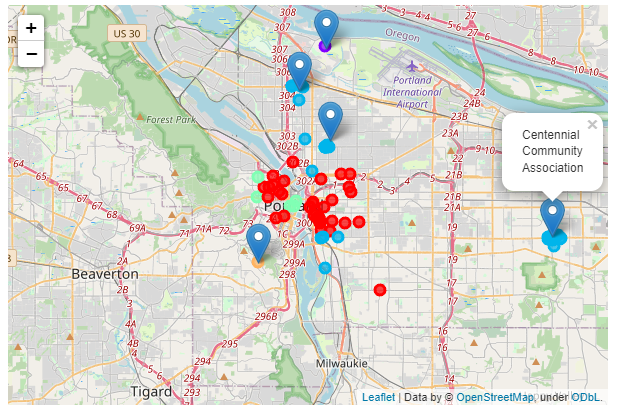

##### Centenniel Neighborhood

Fourteen businesses were found through the FourSquare API. By looking at the map we've created with all businesses in the neighborhoods with the most people aged 18-39, we can see that the Centenniel Neighborhood is the farthest away from current tatto parlors and also has a good number of popular venues in the area. We will create a map of the Centennial Neighborhood and map out the businesses in the area.

In [108]:
dataframe_filtered3

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id,categories
0,Fortune Star Lounge,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",15920 SE Division St,45.504113,-122.499335,"[{'label': 'display', 'lat': 45.50411316024861...",217,97236,US,Portland,OR,United States,"[15920 SE Division St, Portland, OR 97236, Uni...",NaN,4c8c87c855fba093a1a360ab,Bar
1,Regal Division Street,"[{'id': '4bf58dd8d48988d17f941735', 'name': 'M...",16603 SE Division St.,45.505810,-122.492422,"[{'label': 'display', 'lat': 45.50581, 'lng': ...",355,97236,US,Portland,OR,United States,"[16603 SE Division St., Portland, OR 97236, Un...",NaN,4ad60cf8f964a520ce0421e3,Movie Theater
2,Burgerville,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",16211 SE Division St,45.504920,-122.496330,"[{'label': 'display', 'lat': 45.50491971744637...",45,97236,US,Portland,OR,United States,"[16211 SE Division St, Portland, OR 97236, Uni...",NaN,4b539fc9f964a52024a527e3,Burger Joint
3,Les Schwab Tire Center,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",16650 SE Division St,45.504122,-122.491644,"[{'label': 'display', 'lat': 45.50412199999999...",391,97236,US,Portland,OR,United States,"[16650 SE Division St, Portland, OR 97236, Uni...",NaN,4c897ce052a98cfadd8424e9,Automotive Shop
4,U.S. Bank ATM,"[{'id': '52f2ab2ebcbc57f1066b8b56', 'name': 'A...",16002 SE Division St,45.504089,-122.497330,"[{'label': 'display', 'lat': 45.50408935546875...",76,97236,US,Portland,OR,United States,"[16002 SE Division St, Portland, OR 97236, Uni...",NaN,4bd866c05cf276b0ac229d00,ATM
5,Little Caesars Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",16353 SE Division St,45.506013,-122.495093,"[{'label': 'display', 'lat': 45.506013, 'lng':...",199,97236,US,Portland,OR,United States,"[16353 SE Division St, Portland, OR 97236, Uni...",NaN,52f543dd11d242eeca9aa42f,Pizza Place
6,Ross Dress for Less,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",16339 SE Division Street,45.506116,-122.496121,"[{'label': 'display', 'lat': 45.506116, 'lng':...",176,97236,US,Portland,OR,United States,"[16339 SE Division Street, Portland, OR 97236,...",NaN,53474ee0498ef2384a3cbc62,Clothing Store
7,Subway,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",16409 SE Division St Ste 208,45.505560,-122.493871,"[{'label': 'display', 'lat': 45.50556003603361...",241,97236,US,Portland,OR,United States,"[16409 SE Division St Ste 208 (at 162nd), Port...",at 162nd,4bbce1788ec3d13ad45d1b28,Sandwich Place
8,Rite Aid,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",16401 SE Division St,45.506079,-122.494375,"[{'label': 'display', 'lat': 45.5060787, 'lng'...",242,97236,US,Portland,OR,United States,"[16401 SE Division St (162nd), Portland, OR 97...",162nd,4bd5d8406798ef3bb015648d,Pharmacy
9,Disc Heroes,"[{'id': '4bf58dd8d48988d1fb941735', 'name': 'H...",2614 SE 162nd Ave,45.503311,-122.496300,"[{'label': 'display', 'lat': 45.503311, 'lng':...",142,97236,US,Portland,OR,United States,"[2614 SE 162nd Ave, Portland, OR 97236, United...",NaN,528d6c6911d2eb86c160380a,Hobby Shop


In [109]:
centennial_map = folium.Map(width=550,height=300,location=[45.50457, -122.49662],zoom_start=15,min_zoom=4,max_zoom=20)
  
    
# adding businesses as red circle markers
for lat, lng, name, cate, addr, dist in zip(dataframe_filtered3.lat,dataframe_filtered3.lng,dataframe_filtered3.name,dataframe_filtered3.categories,dataframe_filtered3.address,dataframe_filtered3.distance):

    folium.CircleMarker(location=[lat,lng],radius=5,color="red",fill=True,fill_color="red",
                       popup= folium.Popup(('<strong><font color ="red">Name :     </font>'+name+'</strong><br>'), max_width=250)).add_to(centennial_map)
    

# display map
centennial_map

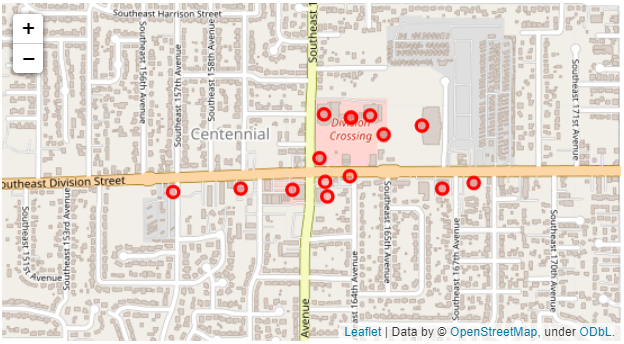

### Results and Discussion <a name="results"></a>

We found five neighborhoods with a large number of residents between the ages of 18 and 39. Three of the neighborhoods (Piedmont, Sabin, and Healy Heights) are relatively close of a large number of tattoo parlors. East Columbia is farther away from tattoo parlors, but only has two businesses that were found through a FourSquare API search. Due to the remoteness of the area, it might not be the most ideal location for a new business. 

The Centenniel Neighborhood seemed to most closely meet the criteria of our search. The Centenniel Neighborhood has the third-highest number of residents aged 18 to 39 with 7,387 residents in this age group represented in the census data we were able to access through PortlandMaps.com. Also, the Centenniel Neighborhood is farther away from current tattoo parlors than some of the other neighborhoods we studied. Finally, we can see that several popular venues are already located in this neighborhood. These venues include restaurants, coffee shops, bars, a movie theater, a hobby shop, and an apparel store. With all of this considered, this neighborhood seems like a promising area for opening a tattoo parlor.



### Conclusion <a name="conclusion"></a>

The purpose of this project was to identify a Portland neighborhood that would be a good option for opening a tattoo parlor. By anaylzing census data for Portland in addition to Foursquare data, we identified neighborhoods that justified further analysis (which neighborhoods have a large number of residents aged 18 to 39 -- people who are statistically most likely to get a tattoo), and then generate lists of popular venues that exist in those neighborhoods. We also searched FourSquare to locate current tattoo parlors in Portland and where they are located in proximity to the neighborhoods we analyzed. Clustering of those locations was then performed in order to show where existing venues were located by neighborhood.

The final decision on optimal tattoo parlor location was based on three criteria: 1) Which neighborhoods have the most residents aged 18 to 39; 2) Which of these neighborhoods already had tattoo parlors nearby; 3) If any of these neighborhoods had current popular venues in the area.